# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, PowerTransformer, FunctionTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

# Dataset

In [9]:
df = pd.read_csv('data/auto-train-preprocessed.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

x_train.shape, y_train.shape

((352, 1), (352, 1))

In [12]:
phi_x_train = polynomial(x_train)

In [10]:
d = 2

w = np.random.randn(d+1, 1)
print(w.shape)

eta = 0.5
n_epochs = 2000

(3, 1)


# Utils

In [2]:
def polynomial(x):
    phi_x = np.array([x**i for i in range(d+1)])
    phi_x = phi_x[..., 0].T
    return phi_x

In [3]:
def linear_regression(x, w):
    y_hat = x @ w
    return y_hat

In [4]:
def mse(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss

In [5]:
def gradient(x, y, y_hat):
    grads = 2*(x.T @ (y_hat - y)) / y.shape[0]
    return grads

In [6]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [7]:
def mae(y, y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

In [8]:
def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

# Model Train

In [13]:
error_hist = []

for epoch in range(n_epochs):
    y_hat = linear_regression(phi_x_train, w)
    
    e = mse(y_train, y_hat)
    error_hist.append(e)
    
    grads = gradient(phi_x_train, y_train, y_hat)
    
    w = gradient_descent(w, eta, grads)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Epoch=99, 	 E=0.01387,	 w=[ 0.75195187 -1.6057776   0.9757579 ]
Epoch=199, 	 E=0.01386,	 w=[ 0.75262814 -1.61031317  0.98113276]
Epoch=299, 	 E=0.01386,	 w=[ 0.75323478 -1.61431069  0.98579975]
Epoch=399, 	 E=0.01386,	 w=[ 0.75376501 -1.61780458  0.98987864]
Epoch=499, 	 E=0.01386,	 w=[ 0.75422843 -1.62085825  0.99344359]
Epoch=599, 	 E=0.01386,	 w=[ 0.75463345 -1.62352715  0.99655936]
Epoch=699, 	 E=0.01386,	 w=[ 0.75498745 -1.62585978  0.99928255]
Epoch=799, 	 E=0.01386,	 w=[ 0.75529684 -1.62789849  1.00166262]
Epoch=899, 	 E=0.01386,	 w=[ 0.75556725 -1.62968033  1.0037428 ]
Epoch=999, 	 E=0.01386,	 w=[ 0.75580359 -1.63123766  1.00556088]
Epoch=1099, 	 E=0.01386,	 w=[ 0.75601015 -1.63259877  1.00714988]
Epoch=1199, 	 E=0.01386,	 w=[ 0.75619068 -1.63378838  1.00853867]
Epoch=1299, 	 E=0.01386,	 w=[ 0.75634847 -1.6348281   1.00975248]
Epoch=1399, 	 E=0.01386,	 w=[ 0.75648637 -1.63573681  1.01081334]
Epoch=1499, 	 E=0.01386,	 w=[ 0.7566069  -1.63653103  1.01174054]
Epoch=1599, 	 E=0.013

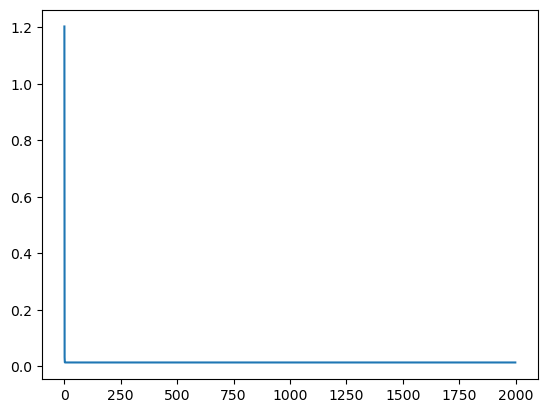

In [14]:
plt.plot(error_hist)

# Evaluation

In [15]:
df = pd.read_csv('data/auto-test-preprocessed.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_test.shape, y_test.shape

((40, 1), (40, 1))

In [16]:
phi_x_test = polynomial(x_test)

In [17]:
y_hat_test = linear_regression(phi_x_test, w)

In [18]:
mae(y_test, y_hat_test)

0.0786135308144137

# Non-linear Regression (scikit-learning)

In [19]:
poly = PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
x_train_poly.shape, x_test_poly.shape

((352, 3), (40, 3))